<a href="https://colab.research.google.com/github/narsym/deep-learning-with-pytorch/blob/master/Pytorch_Logistic_regression_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [61]:
dataset = MNIST(root = 'data/', download = True)

In [62]:
len(dataset)

60000

In [63]:
test_dataset = MNIST(root = 'data/', train = False)

In [64]:
len(test_dataset)

10000

In [65]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F1BD29D3898>, 5)

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


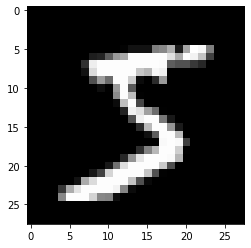

In [67]:
image, label = dataset[0]
plt.imshow(image, cmap = 'gray')
print('Label:', label)

Label: 3


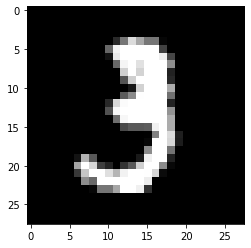

In [68]:
image, label = dataset[10]
plt.imshow(image, cmap = 'gray')
print('Label:', label)

In [69]:
import torchvision.transforms as transforms

In [70]:
dataset = MNIST(root = 'data/', train = True, transform = transforms.ToTensor())

In [71]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [72]:
print(img_tensor[:, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


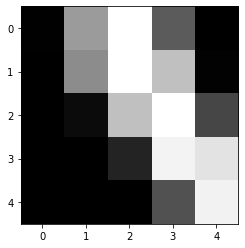

In [73]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap = 'gray')

In [74]:
import numpy as np

def split_indices(n, val_pct):

  n_val =int(val_pct * n)
  idxs = np.random.permutation(n)
  return idxs[n_val :], idxs[: n_val]

In [75]:
train_indices, val_indices = split_indices(len(dataset), val_pct = 0.2)

In [76]:
print(len(train_indices), len(val_indices))
print('Sample val indices: ', val_indices[:20])

48000 12000
Sample val indices:  [ 3113 26930 12695  2918 25494 24147 49854 28448 57897 48647 30339 27067
 20861 44916 38551 56189 47356  2789 59646 41958]


In [77]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [78]:
batch_size = 100

train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset, batch_size, sampler = train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset, batch_size, sampler = val_sampler)

In [79]:
import torch.nn as nn

input_size = 784
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [80]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0316,  0.0166,  0.0022,  ..., -0.0198, -0.0185,  0.0293],
        [-0.0167,  0.0338,  0.0318,  ..., -0.0203, -0.0039,  0.0324],
        [-0.0351, -0.0227,  0.0106,  ...,  0.0283,  0.0311, -0.0069],
        ...,
        [-0.0346,  0.0236, -0.0098,  ...,  0.0054,  0.0057,  0.0097],
        [ 0.0270,  0.0143, -0.0127,  ..., -0.0200, -0.0086, -0.0038],
        [ 0.0167, -0.0047, -0.0240,  ..., -0.0209, -0.0296,  0.0057]],
       requires_grad=True)

In [81]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0097, -0.0310,  0.0208, -0.0083,  0.0159, -0.0088,  0.0177,  0.0142,
        -0.0162, -0.0247], requires_grad=True)

In [82]:
for images, labels in train_loader:
  print(labels)
  print(images.shape)
  outputs = model(images)
  break

tensor([7, 0, 4, 4, 4, 9, 8, 3, 3, 7, 8, 9, 9, 9, 0, 8, 6, 3, 1, 7, 6, 6, 4, 6,
        0, 6, 0, 9, 1, 0, 7, 7, 7, 3, 2, 1, 6, 4, 5, 2, 0, 9, 1, 5, 7, 2, 7, 3,
        0, 1, 1, 1, 8, 3, 8, 4, 1, 1, 3, 6, 6, 2, 1, 0, 6, 8, 6, 1, 2, 3, 8, 5,
        2, 8, 6, 5, 7, 0, 0, 7, 4, 0, 4, 1, 9, 3, 1, 4, 7, 3, 5, 8, 1, 0, 5, 6,
        3, 6, 9, 9])
torch.Size([100, 1, 28, 28])


RuntimeError: ignored

In [125]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1, 784) #work with any different batchsize using -1
    out = self.linear(xb)
    return out

model = MnistModel()
print(model)

MnistModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [126]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0167, -0.0122,  0.0155,  ...,  0.0302, -0.0121,  0.0191],
         [ 0.0320,  0.0194, -0.0017,  ...,  0.0009, -0.0338, -0.0237],
         [-0.0174, -0.0112, -0.0108,  ...,  0.0215, -0.0132, -0.0280],
         ...,
         [ 0.0193,  0.0214,  0.0111,  ...,  0.0064, -0.0355, -0.0037],
         [ 0.0344,  0.0029, -0.0051,  ..., -0.0099,  0.0032, -0.0300],
         [-0.0163,  0.0116,  0.0260,  ...,  0.0201,  0.0174,  0.0107]],
        requires_grad=True), Parameter containing:
 tensor([-0.0216, -0.0213, -0.0043,  0.0083, -0.0329,  0.0198,  0.0158,  0.0129,
          0.0050, -0.0197], requires_grad=True)]

In [127]:
for images, labels, in train_loader:
  outputs = model(images)
  break

print('outputs.shape: ', outputs.shape)
print('sample outputs: \n', outputs[:2].data)

outputs.shape:  torch.Size([100, 10])
sample outputs: 
 tensor([[ 0.0678, -0.1945,  0.0160,  0.1802, -0.3739,  0.0103,  0.3242,  0.2328,
          0.3687, -0.2050],
        [-0.1110, -0.0728, -0.2631,  0.0716, -0.2399,  0.0011,  0.5847,  0.3068,
          0.0058, -0.0500]])


In [128]:
import torch.nn.functional as F

In [129]:
probs = F.softmax(outputs, dim = 1)

print('Sample probabilities: \n', probs[:2].data)

print('Sum: ', torch.sum(probs[0]).item())

Sample probabilities: 
 tensor([[0.0999, 0.0769, 0.0949, 0.1118, 0.0642, 0.0943, 0.1291, 0.1178, 0.1350,
         0.0761],
        [0.0847, 0.0880, 0.0727, 0.1017, 0.0745, 0.0947, 0.1698, 0.1286, 0.0952,
         0.0900]])
Sum:  0.9999999403953552


In [130]:
max_probs, preds = torch.max(probs, dim = 1)
print(preds)
print(max_probs)

tensor([8, 6, 6, 6, 6, 6, 6, 7, 0, 7, 7, 6, 6, 7, 6, 6, 8, 6, 3, 6, 3, 6, 6, 6,
        7, 6, 3, 1, 6, 6, 6, 1, 8, 7, 6, 6, 6, 8, 7, 7, 3, 6, 6, 3, 8, 5, 6, 6,
        6, 3, 6, 9, 7, 6, 7, 6, 6, 6, 6, 3, 1, 7, 7, 3, 6, 6, 7, 3, 6, 6, 6, 6,
        6, 6, 7, 0, 7, 6, 6, 8, 6, 6, 6, 6, 6, 6, 3, 6, 6, 6, 7, 6, 3, 7, 6, 6,
        6, 6, 6, 6])
tensor([0.1350, 0.1698, 0.1552, 0.1341, 0.1444, 0.1726, 0.1388, 0.1283, 0.1121,
        0.1419, 0.1323, 0.1679, 0.1635, 0.1263, 0.1273, 0.1371, 0.1309, 0.1861,
        0.1166, 0.1540, 0.1207, 0.1694, 0.1254, 0.1362, 0.1405, 0.1346, 0.1528,
        0.1404, 0.1281, 0.1675, 0.1433, 0.1305, 0.1298, 0.1209, 0.1329, 0.1633,
        0.1409, 0.1162, 0.1330, 0.1457, 0.1411, 0.1688, 0.1241, 0.1385, 0.1240,
        0.1107, 0.1550, 0.1199, 0.1390, 0.1259, 0.1413, 0.1310, 0.1275, 0.1598,
        0.1379, 0.1251, 0.1309, 0.1481, 0.1493, 0.1240, 0.1329, 0.1193, 0.1349,
        0.1336, 0.1327, 0.1487, 0.1370, 0.1235, 0.1280, 0.1453, 0.1306, 0.1743,
        0.1364, 0.1

In [131]:
labels

tensor([0, 3, 0, 5, 3, 0, 6, 1, 7, 8, 6, 2, 9, 9, 3, 3, 7, 3, 1, 2, 9, 0, 1, 1,
        6, 7, 2, 7, 4, 7, 6, 7, 3, 9, 9, 8, 3, 7, 5, 4, 5, 7, 3, 4, 5, 9, 7, 4,
        7, 9, 6, 7, 8, 6, 6, 1, 8, 6, 3, 1, 7, 9, 5, 4, 7, 7, 5, 2, 7, 7, 8, 3,
        7, 8, 4, 4, 2, 3, 3, 8, 3, 8, 5, 2, 1, 8, 8, 2, 3, 0, 4, 1, 2, 1, 4, 2,
        2, 8, 4, 7])

In [132]:
def accuracy(l1, l2):
  return torch.sum(l1 == l2).item() / len(l1)

In [133]:
accuracy(preds, labels)

0.06

In [134]:
loss_fn = F.cross_entropy

In [135]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3366, grad_fn=<NllLossBackward>)


In [136]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [137]:
def loss_batch(model, loss_func, xb, yb, opt = None, metric = None):

  preds = model(xb)
  loss = loss_func(preds, yb)

  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()

  metric_result = None
  if metric is not None:
    metric_result = metric(preds, yb)

  return loss.item(), len(xb), metric_result

In [ ]:
for xb, yb in train_loader:
  print(loss_batch(model, F.cross_entropy, xb, yb, optimizer, metric = accuracy))

In [141]:
def evaluate(model, loss_fn, valid_dl, metric = None):
  with torch.no_grad():
    results = [loss_batch(model, loss_fn, xb, yb, metric = metric) for xb, yb, in valid_dl]

    losses, nums, metrics = zip(*results)
    total = np.sum(nums)

    avg_loss = np.sum(np.multiply(losses, nums)) / total
    avg_metric = None

    if metric is not None:
      avg_metric = np.sum(np.multiply(metrics, nums)) / total

  return avg_loss, total, avg_metric

In [142]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim = 1)
  return torch.sum(preds == labels).item() / len(preds)

In [143]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, accuracy)
print(f'Loss: {val_loss}, Accuracy: {val_acc}')

Loss: 1.9026235977808634, Accuracy: 0.6051666666666666


In [151]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric = None):
  for epoch in range(epochs):

    for xb, yb, in train_dl:
      loss, _, _ = loss_batch(model, loss_fn, xb, yb, opt)

    result = evaluate(model, loss_fn, valid_dl, metric)
    val_loss, total, val_metric = result

    if metric is None:
      print(f'Epoch : [{epoch + 1} / {epochs}], Loss : {val_loss}')

    else:
      print(f'Epoch : [{epoch + 1} / {epochs}], Loss : {val_loss}, {metric.__name__}, {val_metric}')

In [152]:
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.001
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [153]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch : [1 / 5], Loss : 1.8521830687920253, accuracy, 0.6773333333333333
Epoch : [2 / 5], Loss : 1.565348129471143, accuracy, 0.7439166666666667
Epoch : [3 / 5], Loss : 1.3635883202155432, accuracy, 0.7705
Epoch : [4 / 5], Loss : 1.217963911096255, accuracy, 0.7889166666666667
Epoch : [5 / 5], Loss : 1.1095266511042914, accuracy, 0.8003333333333333


In [154]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch : [1 / 5], Loss : 1.026233318944772, accuracy, 0.8096666666666666
Epoch : [2 / 5], Loss : 0.9604583332935969, accuracy, 0.8170833333333334
Epoch : [3 / 5], Loss : 0.907280711332957, accuracy, 0.824
Epoch : [4 / 5], Loss : 0.8633125782012939, accuracy, 0.8279166666666666
Epoch : [5 / 5], Loss : 0.8263461540142695, accuracy, 0.8314166666666667


In [155]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch : [1 / 5], Loss : 0.794845383365949, accuracy, 0.8356666666666667
Epoch : [2 / 5], Loss : 0.7676244725783666, accuracy, 0.8371666666666666
Epoch : [3 / 5], Loss : 0.7438332860668501, accuracy, 0.83975
Epoch : [4 / 5], Loss : 0.722846103211244, accuracy, 0.8410833333333333
Epoch : [5 / 5], Loss : 0.7041573598980904, accuracy, 0.8439166666666666


save model

In [111]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [112]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0353,  0.0319, -0.0277,  ...,  0.0350, -0.0351, -0.0241],
                      [-0.0040, -0.0240, -0.0111,  ..., -0.0001,  0.0331, -0.0132],
                      [-0.0204, -0.0253, -0.0261,  ..., -0.0131,  0.0116, -0.0161],
                      ...,
                      [ 0.0059,  0.0060,  0.0158,  ...,  0.0047, -0.0323, -0.0059],
                      [-0.0211,  0.0181,  0.0345,  ...,  0.0329,  0.0086, -0.0237],
                      [ 0.0055, -0.0150, -0.0260,  ..., -0.0356,  0.0177, -0.0123]])),
             ('linear.bias',
              tensor([ 0.0271,  0.0040, -0.0236, -0.0189,  0.0060, -0.0098, -0.0022,  0.0220,
                       0.0163,  0.0313]))])

In [113]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0353,  0.0319, -0.0277,  ...,  0.0350, -0.0351, -0.0241],
                      [-0.0040, -0.0240, -0.0111,  ..., -0.0001,  0.0331, -0.0132],
                      [-0.0204, -0.0253, -0.0261,  ..., -0.0131,  0.0116, -0.0161],
                      ...,
                      [ 0.0059,  0.0060,  0.0158,  ...,  0.0047, -0.0323, -0.0059],
                      [-0.0211,  0.0181,  0.0345,  ...,  0.0329,  0.0086, -0.0237],
                      [ 0.0055, -0.0150, -0.0260,  ..., -0.0356,  0.0177, -0.0123]])),
             ('linear.bias',
              tensor([ 0.0271,  0.0040, -0.0236, -0.0189,  0.0060, -0.0098, -0.0022,  0.0220,
                       0.0163,  0.0313]))])